### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [3]:
vd = pd.read_csv('vehicle.csv')
vd.shape

(846, 19)

In [4]:
vd = pd.read_csv('vehicle.csv').dropna()
vd.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202,van
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car


In [5]:
vd = vd.reset_index(drop=True)
vd.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [6]:
vd.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [7]:
vd['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

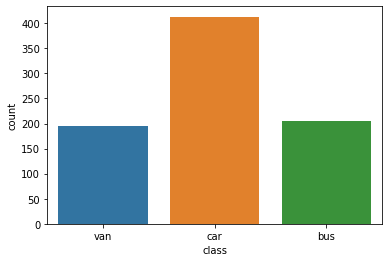

In [8]:
sns.countplot(vd['class'])

### Check for any missing values in the data 

In [9]:
vd.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

No null values have been found as we have dropped the same earlier.In addition to that from "info" of data we can say that,there are no missing values present in terms of special characters as exacept'class' all the results are of int type.

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [11]:
vdz=vd.drop('class',axis=1)
vdz.head(1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197


In [12]:
from scipy.stats import zscore

vdz = vdz.apply(zscore)

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [13]:
cluster_errors=[]

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [14]:
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn import metrics

In [15]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vdz)
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
 






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors  } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.415426
4,5,5191.931115
5,6,4707.860902
6,7,4355.139334
7,8,4090.060374
8,9,3867.463310


Different code for same thing

In [16]:
Cluster_error = []
for k_number in range(1,10):
    kmod = KMeans(n_clusters=k_number,n_init=5,random_state=4)
    kmod.fit(vdz)
    #labels = kmod.labels_                     # capture the cluster lables
    #centroids = kmod.cluster_centers_       # capture the centroids
    print('K = {} cluster error is : {}'.format(k_number,kmod.inertia_))
    Cluster_error.append( kmod.inertia_ )    # capture the intertia

K = 1 cluster error is : 14634.0
K = 2 cluster error is : 8623.13697598644
K = 3 cluster error is : 7037.467394618071
K = 4 cluster error is : 5740.415426448088
K = 5 cluster error is : 5191.036235568616
K = 6 cluster error is : 4718.78000356317
K = 7 cluster error is : 4356.90158743778
K = 8 cluster error is : 4089.894296361382
K = 9 cluster error is : 3845.9559245880714


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

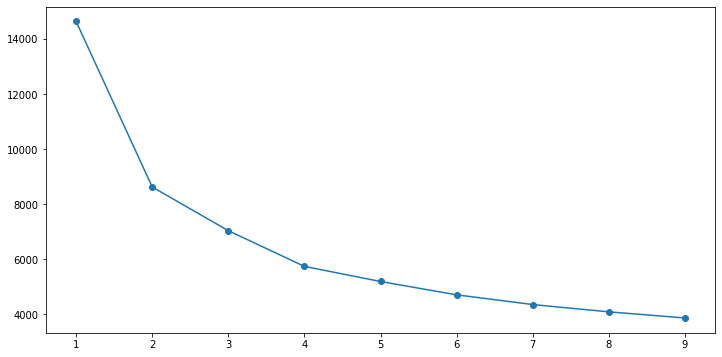

In [17]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

 The elbow plot shows that 4 might be a good choice for K .

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [18]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(vdz)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [19]:
centroids = cluster.cluster_centers_
centroids

array([[-2.13500277e-01, -5.67572972e-01, -2.95628226e-01,
        -1.91022365e-02,  1.91818192e-01, -1.70225098e-01,
        -4.43512774e-01,  3.03183878e-01, -4.73800458e-01,
        -5.31082478e-01, -4.08420378e-01, -4.49349497e-01,
        -5.93030219e-01, -6.52678719e-01, -4.98362181e-02,
         1.18541663e-02,  8.52195044e-01,  7.33987197e-01],
       [ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-9.06101420e-01, -5.36093671e-01, -8.81135798e-01,
        -1.07237417e+00, -5.48347532e-01, -2.99127932e-01,
        -7.82915761e-01,  8.68120486e-01, -7.49690067e-01,
        -4.98429173e-01, -8.02269752e-01, -7.85506804e-01,
        -4.14229104e-01,  7.37732703e-01, -1.04184507e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [20]:
centroid_df = pd.DataFrame(centroids, columns = list(vdz) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.213500,-0.567573,-0.295628,-0.019102,0.191818,-0.170225,-0.443513,0.303184,-0.473800,-0.531082,-0.408420,-0.449349,-0.593030,-0.652679,-0.049836,0.011854,0.852195,0.733987
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.906101,-0.536094,-0.881136,-1.072374,-0.548348,-0.299128,-0.782916,0.868120,-0.749690,-0.498429,-0.802270,-0.785507,-0.414229,0.737733,-0.104185,-0.282342,-1.008796,-1.065424
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [21]:
 cluster.labels_

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 3, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [22]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [23]:
data2 = pd.DataFrame(np.concatenate((a,b,c),axis=0),columns=['col1','col2'])
data2

,col1,col2
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
...,...,...
245,9.248848,24.346291
246,6.958291,16.448655
247,11.260042,20.333577
248,6.889835,21.238297


### 10. Use scatter matrix to print all the 3 distributions

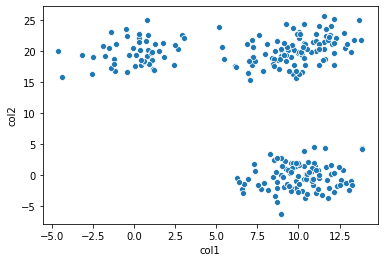

In [24]:
sns.scatterplot(x=data2['col1'],y=data2['col2'])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [25]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage,fcluster
from scipy.spatial.distance import pdist

In [26]:
Z = linkage(data2, 'ward',metric ='euclidean')
c, coph_dists = cophenet(Z , pdist(data2))
c

0.9536963071171022

In [27]:
Z

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

### 12. Plot the dendrogram for the consolidated dataframe

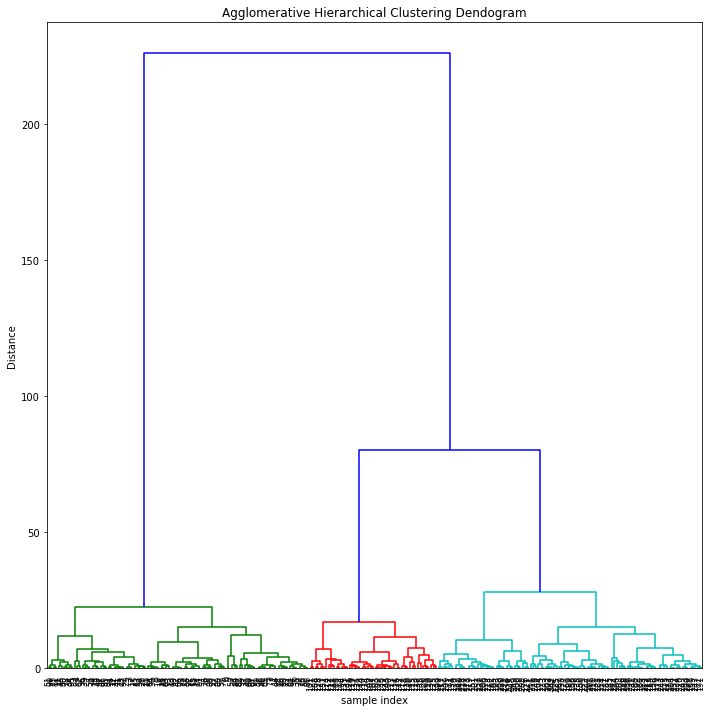

In [28]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

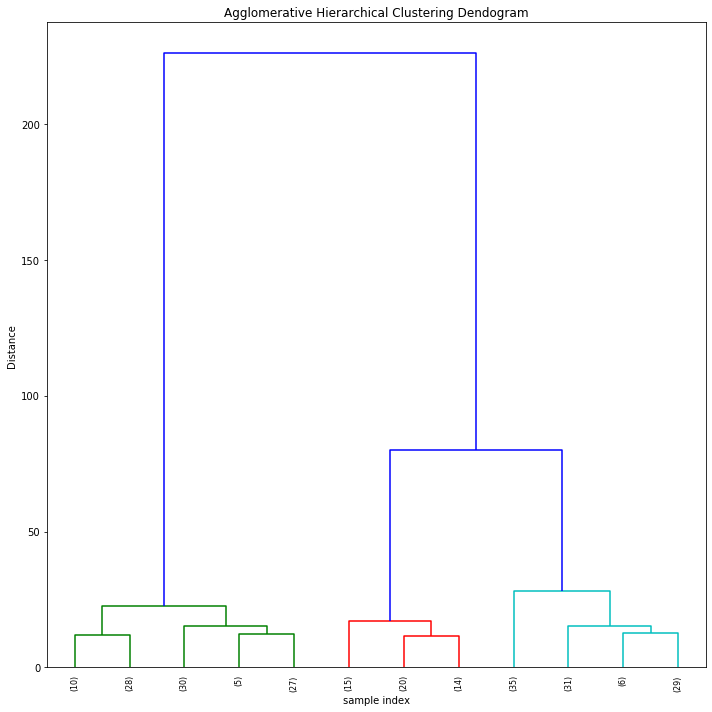

In [29]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, p=12 ,truncate_mode='lastp',leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [30]:
from collections import Counter
optimal_dist = 0
for dist in range (20,80):
    if(len(Counter(fcluster(Z,t=dist,criterion ='distance')).keys())==3):
        print('Optimal Distance =',dist)
        optimal_dist =dist
        break

Optimal Distance = 29


### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [31]:
clusters = fcluster(Z,t=optimal_dist,criterion='distance')

In [32]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

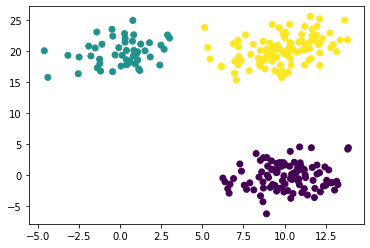

In [33]:
plt.scatter(data2.iloc[:,0],data2.iloc[:,1],c=clusters)